# Contents
# 1. Data Import
# 2. Data Checking, cleaning
# 3. Find k score
# 4. Apply kmeans
# 5. Interpretation

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [15]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# 1. Data Import

In [5]:
# Define file path
path = r'/Users/alison/Documents/Data Analysis - Tasks/6.1' 
# Get Electric Vehicle df
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared', 'EV_HI_2010_to_2016.pkl'))

# 2. Data Cleaning 

In [17]:
df.shape

(19748, 21)

In [9]:
df.head()

,County,State,Model Year,Median Income,VIN (1-10),City,Postal Code,Make,Model,Electric Vehicle Type,...,Electric Range,Base MSRP,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,ER,Longitude,Latitude,_merge
0,Adams,WA,2011,40697.8,JN1AZ0CPXB,Othello,99344.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),...,73.0,57136.66474,118833235,POINT (-119.1742 46.82616),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,Mid-range,-119.17420,46.82616,both
1,Adams,WA,2012,40922.4,JN1AZ0CP6C,Othello,99344.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),...,73.0,57136.66474,159968420,POINT (-119.1742 46.82616),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,Mid-range,-119.17420,46.82616,both
2,Adams,WA,2013,44315.0,3FA6P0SUXD,Othello,99344.0,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),...,19.0,57136.66474,177219857,POINT (-119.1742 46.82616),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,Low-range,-119.17420,46.82616,both
3,Adams,WA,2014,45199.2,1FADP5CUXE,Ritzville,99169.0,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),...,19.0,57136.66474,195909430,POINT (-118.37977 47.1274),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,Low-range,-118.37977,47.12740,both
4,Adams,WA,2014,45199.2,WBY1Z2C58E,Othello,99344.0,BMW,I3,Battery Electric Vehicle (BEV),...,81.0,57136.66474,265934854,POINT (-119.1742 46.82616),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,Mid-range,-119.17420,46.82616,both


In [11]:
df.dtypes

County                                                 object
State                                                  object
Model Year                                              int64
Median Income                                         float64
VIN (1-10)                                             object
City                                                   object
Postal Code                                           float64
Make                                                   object
Model                                                  object
Electric Vehicle Type                                  object
Clean Alternative Fuel Vehicle (CAFV) Eligibility      object
Electric Range                                        float64
Base MSRP                                             float64
DOL Vehicle ID                                          int64
Vehicle Location                                       object
Electric Utility                                       object
2020 Cen

# 3. Find k score

In [19]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [21]:
EV_df = df[['Model Year', 'Median Income', 'Electric Range', 'Base MSRP']]

In [23]:
EV_df.head()

,Model Year,Median Income,Electric Range,Base MSRP
0,2011,40697.8,73.0,57136.66474
1,2012,40922.4,73.0,57136.66474
2,2013,44315.0,19.0,57136.66474
3,2014,45199.2,19.0,57136.66474
4,2014,45199.2,81.0,57136.66474


In [25]:
score = [kmeans[i].fit(EV_df).score(EV_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3581804963987.0806,
 -1239397682126.1777,
 -818083475715.6736,
 -624269242460.3287,
 -582944744369.394,
 -416988984480.404,
 -283121660731.0093,
 -219433774568.7506,
 -199112053555.05676]

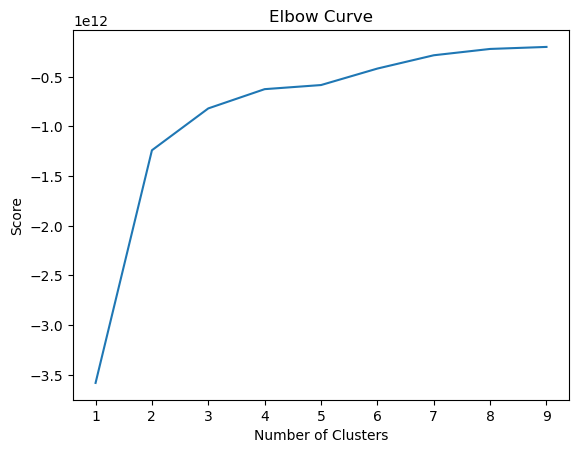

In [27]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [29]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [31]:
# Fit the k-means object to the data.

kmeans.fit(EV_df)

KMeans(n_clusters=3)

# 4. Apply kmeans

In [33]:
EV_df['clusters'] = kmeans.fit_predict(EV_df)

/var/folders/jw/8t4p8wwd697952d93tqmdh180000gp/T/ipykernel_3511/837061760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EV_df['clusters'] = kmeans.fit_predict(EV_df)


In [35]:
EV_df.head()

,Model Year,Median Income,Electric Range,Base MSRP,clusters
0,2011,40697.8,73.0,57136.66474,0
1,2012,40922.4,73.0,57136.66474,0
2,2013,44315.0,19.0,57136.66474,0
3,2014,45199.2,19.0,57136.66474,0
4,2014,45199.2,81.0,57136.66474,0


In [37]:
EV_df['clusters'].value_counts()

clusters
1    10709
2     5176
0     3863
Name: count, dtype: int64

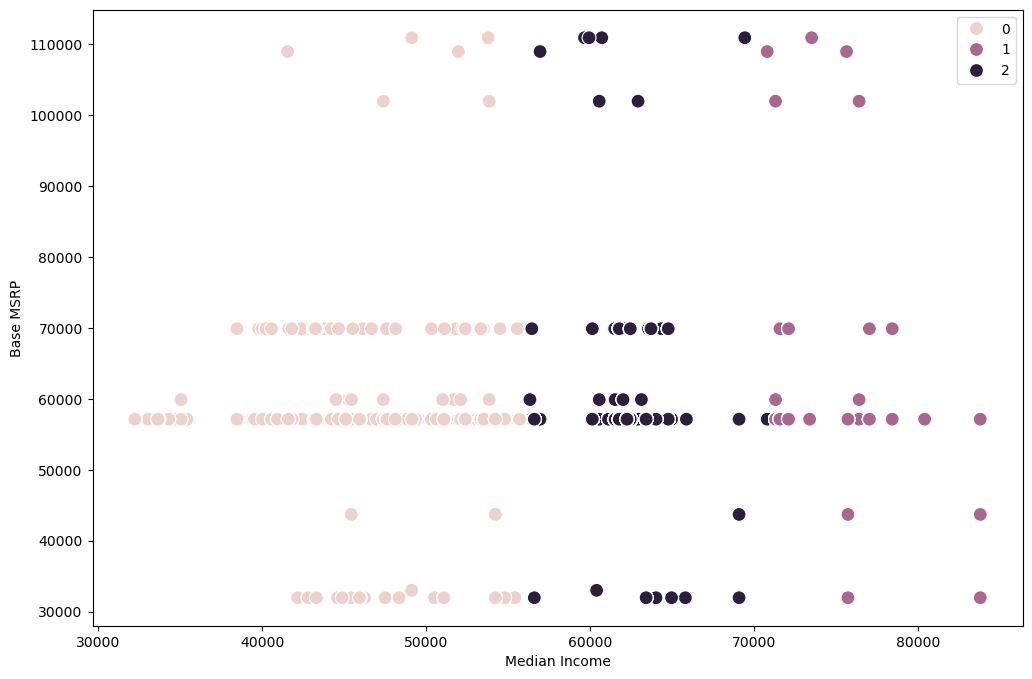

In [39]:
# Plot the clusters for the "Median Income" and "Electric Range" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=EV_df['Median Income'], y=EV_df['Base MSRP'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Median Income') # Label x-axis.
plt.ylabel('Base MSRP') # Label y-axis.
plt.show() # clusters represent income levels? The colour spread follows income brackets.

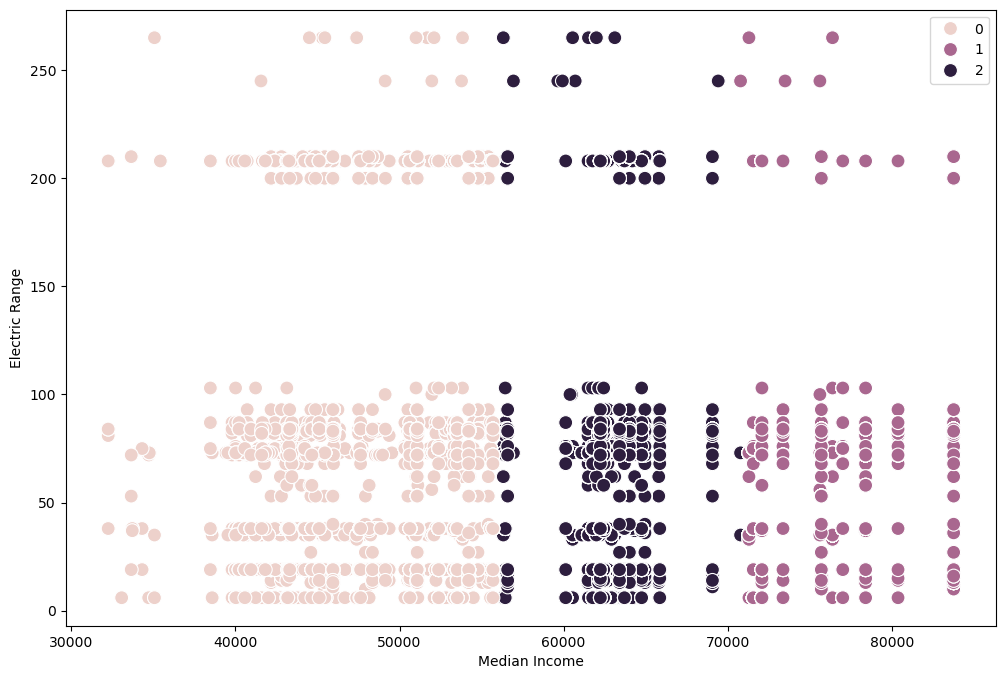

In [41]:
# Plot the clusters for the "Median Income" and "Electric Range" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=EV_df['Median Income'], y=EV_df['Electric Range'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Median Income') # Label x-axis.
plt.ylabel('Electric Range') # Label y-axis.
plt.show() # clusters represent income level?

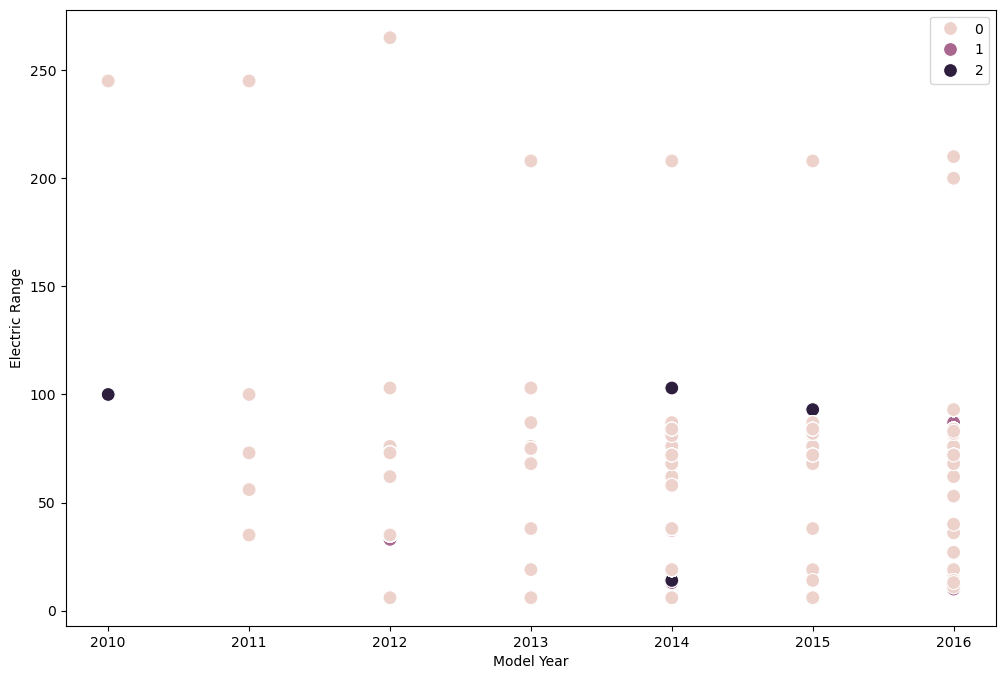

In [43]:
# Plot the clusters for the "Model Year" and "Electric Range" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=EV_df['Model Year'], y=EV_df['Electric Range'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Model Year') 
plt.ylabel('Electric Range') 
plt.show() # why is cluster 1 not really present here? Covered by others - imputed mean issue.

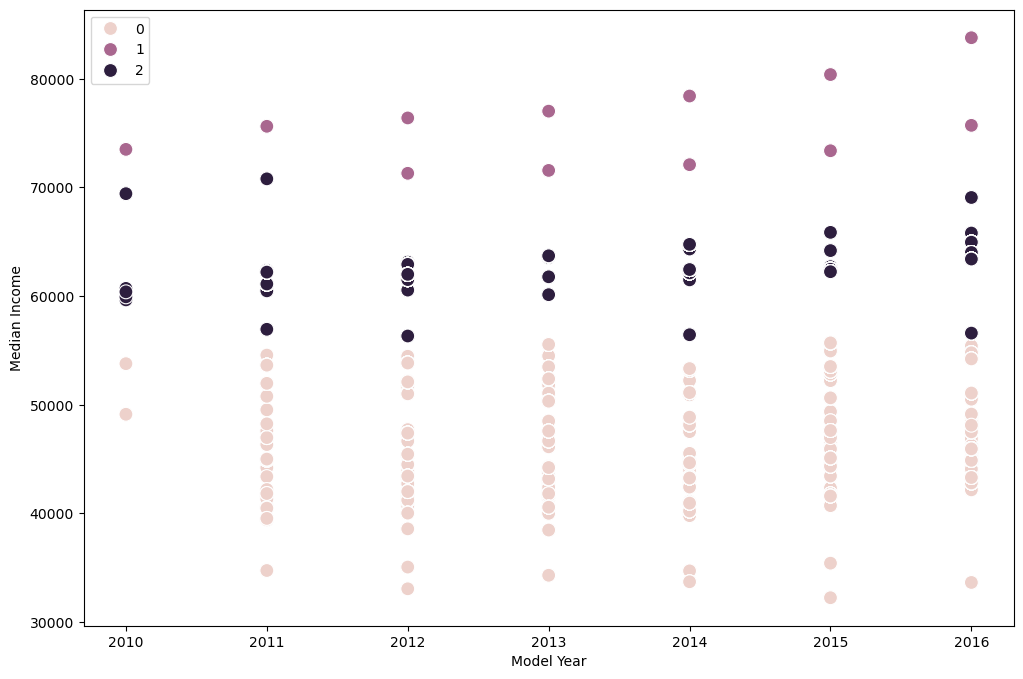

In [47]:
# Plot the clusters for the "Model Year" and "Median Income" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=EV_df['Model Year'], y=EV_df['Median Income'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Model Year') 
plt.ylabel('Median Income') 
plt.show() # EVS more popular with low to middle income than middle to high, is this because of rising fuel prices? Invest in EV to save day to day?

In [49]:
EV_df.loc[EV_df['clusters'] == 2, 'cluster'] = 'dark purple' #middle income
EV_df.loc[EV_df['clusters'] == 1, 'cluster'] = 'pink' #high income
EV_df.loc[EV_df['clusters'] == 0, 'cluster'] = 'white' #low income

/var/folders/jw/8t4p8wwd697952d93tqmdh180000gp/T/ipykernel_3511/8880336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EV_df.loc[EV_df['clusters'] == 2, 'cluster'] = 'dark purple' #middle income


In [57]:
EV_df.groupby('cluster').agg({'Model Year':['mean', 'median'], 
                         'Median Income':['mean', 'median'], 
                         'Electric Range':['mean', 'median'], 'Base MSRP': ['mean', 'median']})

Model Year         Median Income               Electric Range  \
                    mean  median          mean        median           mean   
cluster                                                                       
dark purple  2014.188369  2014.0  62963.725576  62468.691860      82.460008   
pink         2014.405920  2015.0  78654.649408  78408.733668      93.489401   
white        2014.149884  2014.0  48785.503009  50631.657143      80.772457   

                       Base MSRP               
            median          mean       median  
cluster                                        
dark purple   75.0  57557.777406  57136.66474  
pink          83.0  57719.907388  57136.66474  
white         75.0  57498.345356  57136.66474

# 5. Interpretation
# high income more likely to have latest model
# high uptake in low income households
# long electric range not as available as mid range. Most people have mid distance battery range. No change on model year.
# further analysis income flag by make, model
# further analysis on location of car city, urban, suburban, rural

In [53]:
# Export data to pkl

EV_df.to_pickle(os.path.join(path, '02 Data','Prepared', 'EV_HI_4_cluster.pkl'))

In [55]:
EV_df.head()

,Model Year,Median Income,Electric Range,Base MSRP,clusters,cluster
0,2011,40697.8,73.0,57136.66474,0,white
1,2012,40922.4,73.0,57136.66474,0,white
2,2013,44315.0,19.0,57136.66474,0,white
3,2014,45199.2,19.0,57136.66474,0,white
4,2014,45199.2,81.0,57136.66474,0,white


In [59]:
EV_df.shape

(19748, 6)

In [61]:
EV_df.describe()

,Model Year,Median Income,Electric Range,Base MSRP,clusters
count,19748.000000,19748.000000,19748.000000,19748.000000,19748.000000
mean,2014.298815,68699.173699,88.110948,57634.071915,1.066488
std,1.435815,12407.649662,66.406649,5237.421450,0.673290
min,2010.000000,32241.000000,6.000000,31950.000000,0.000000
25%,2013.000000,61762.366279,38.000000,57136.664740,1.000000
50%,2015.000000,72090.556291,75.000000,57136.664740,1.000000
75%,2016.000000,78408.733668,84.000000,57136.664740,2.000000
max,2016.000000,83773.424623,265.000000,110950.000000,2.000000
